In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.animation as anim
import matplotlib.ticker as ticker
import PIL
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs

In [2]:
data = xr.open_dataset('/home/cwk26/project/gfdl_data/top_down_test_obliquity15/run0002/atmos_daily.nc',decode_times=False)

In [7]:

data = xr.open_dataset('/home/cwk26/project/gfdl_data/top_down_test_obliquity15/run0002/atmos_daily.nc',decode_times=False)
time = data.time
lon = data.lon
lat = data.lat
pfull = data.pfull
u = data.ucomp
v = data.vcomp
temp = data.temp
vort = data.vor
tbar = np.mean(np.mean(temp,axis=0),axis=2)

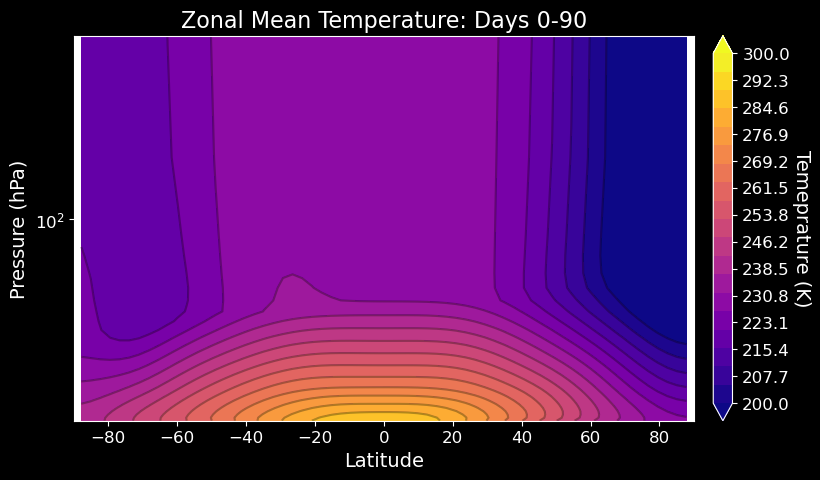

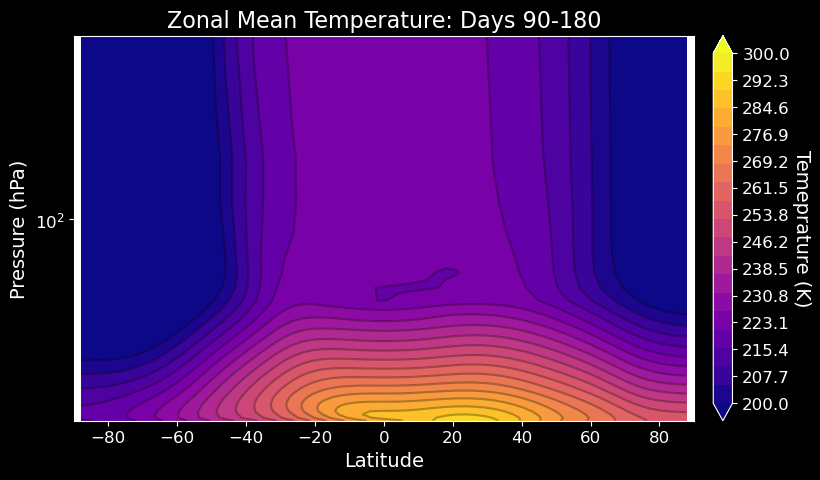

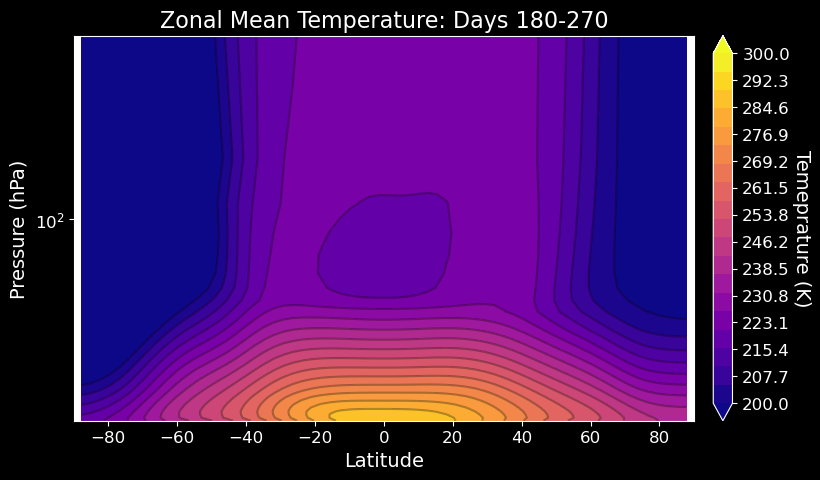

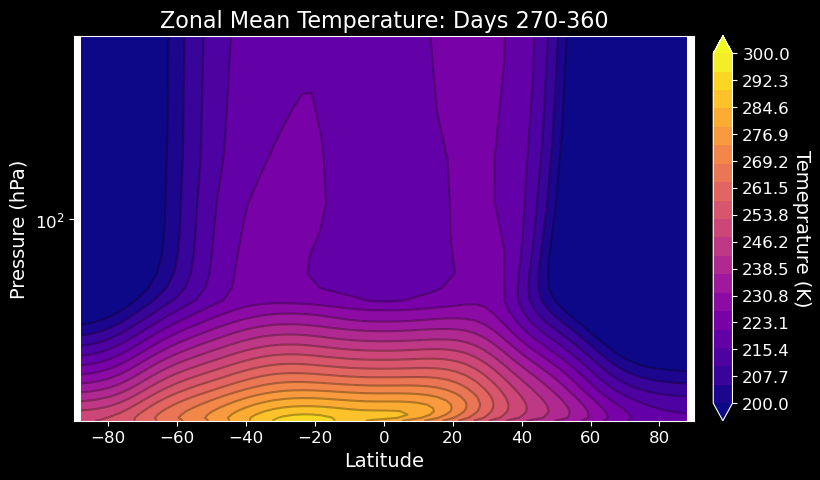

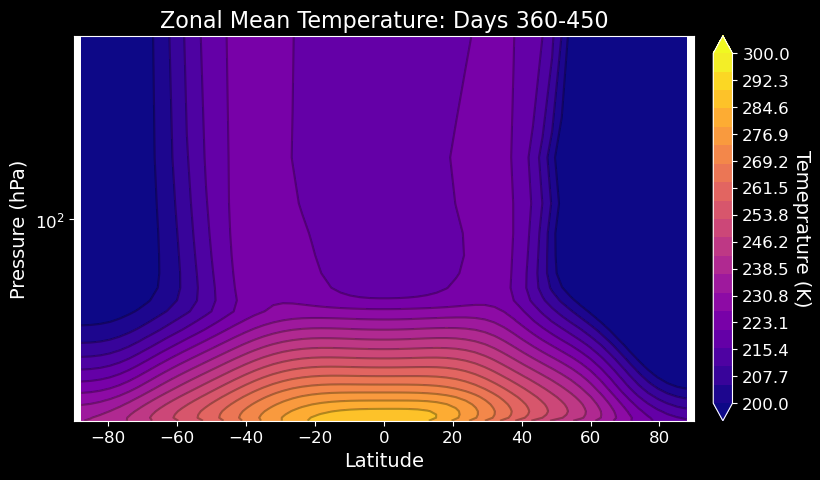

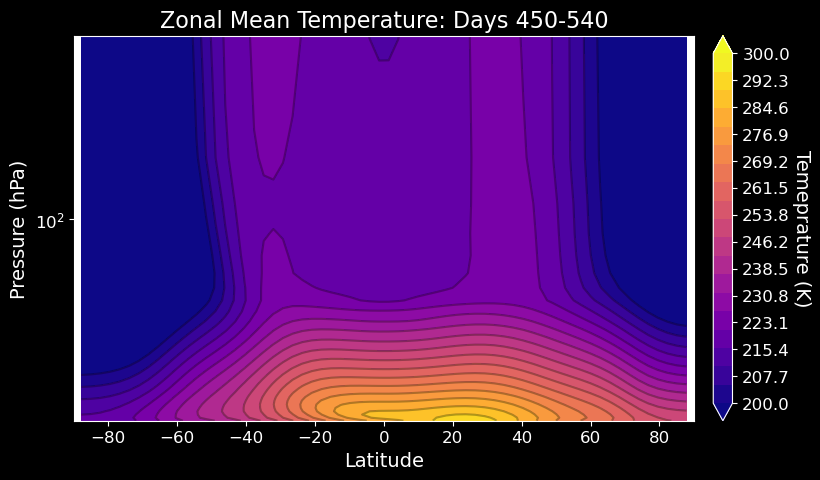

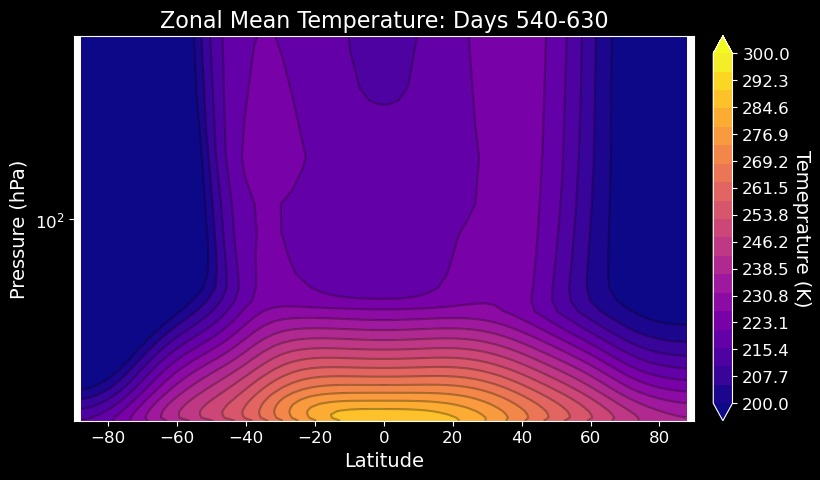

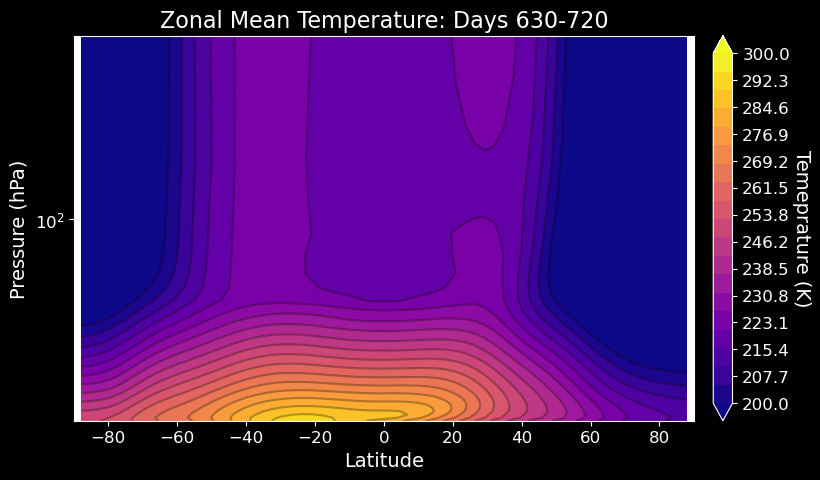

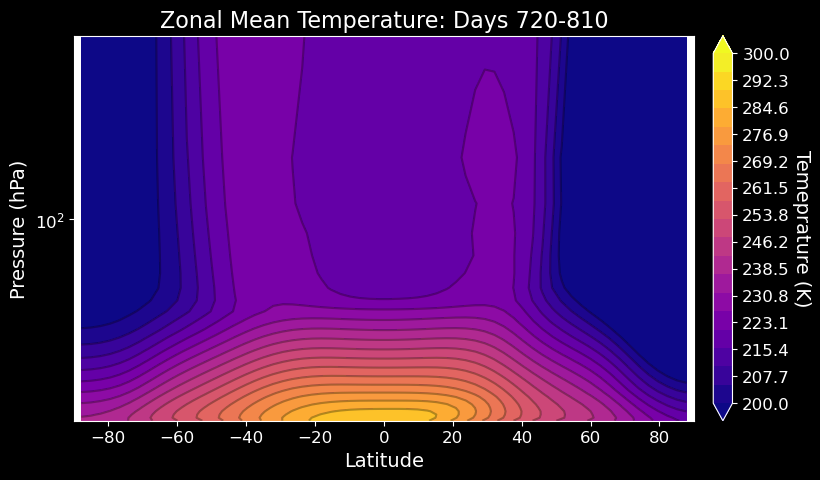

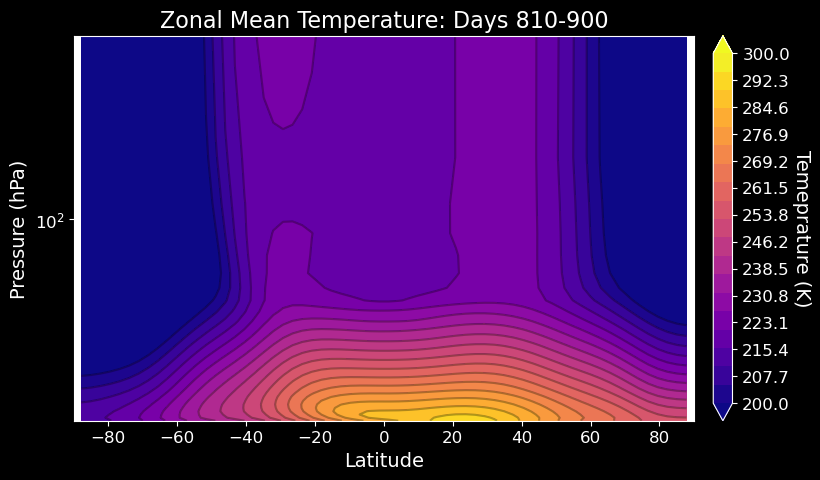

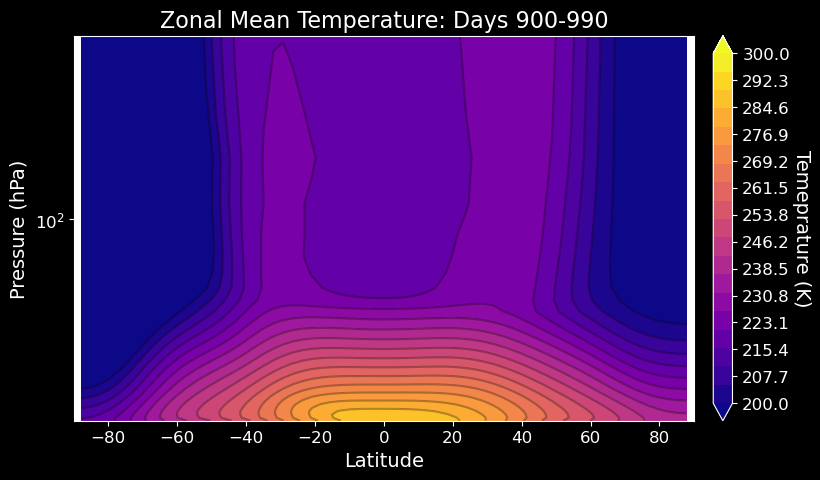

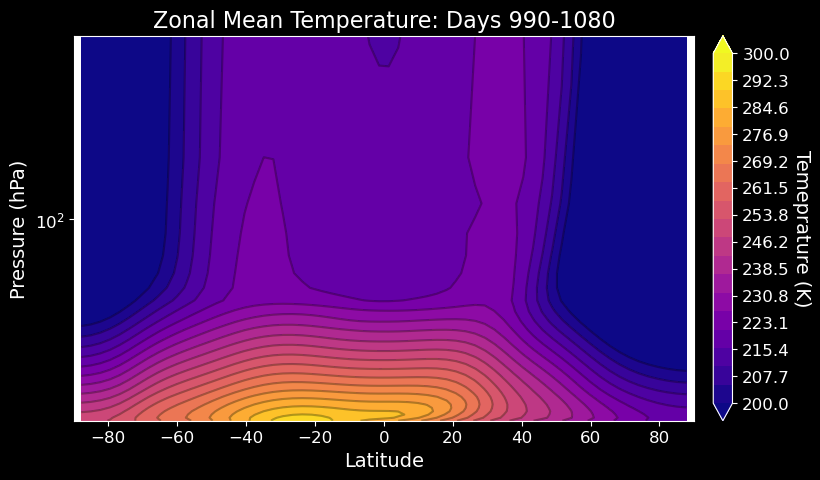

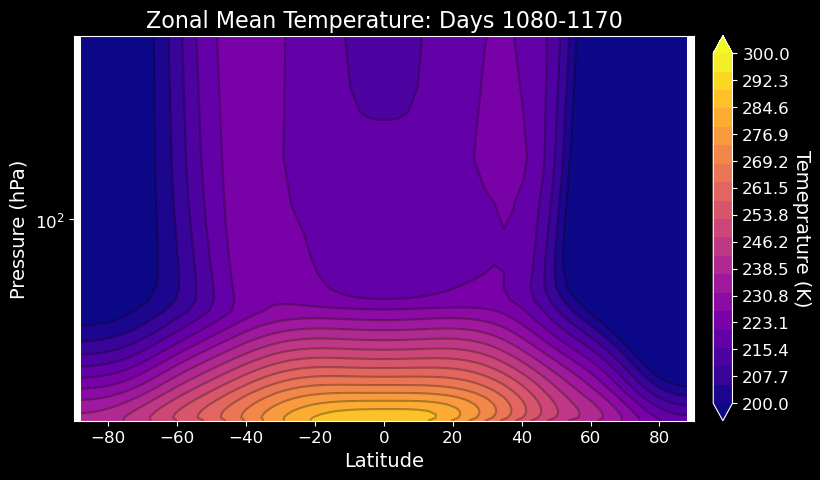

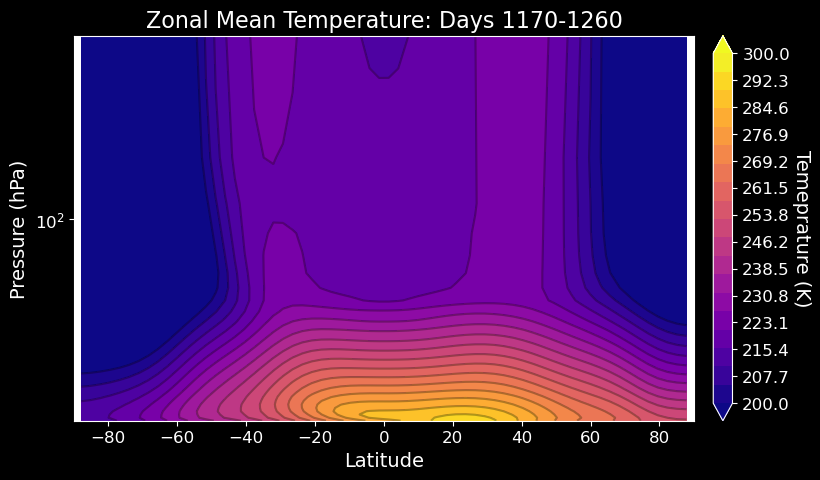

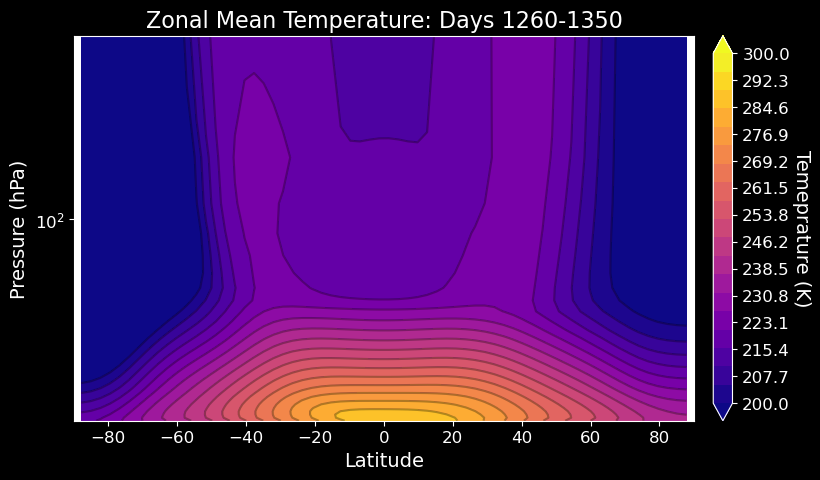

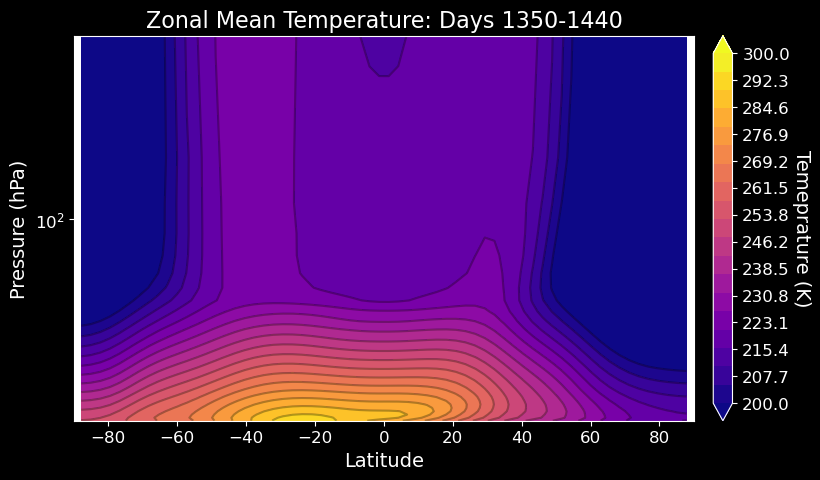

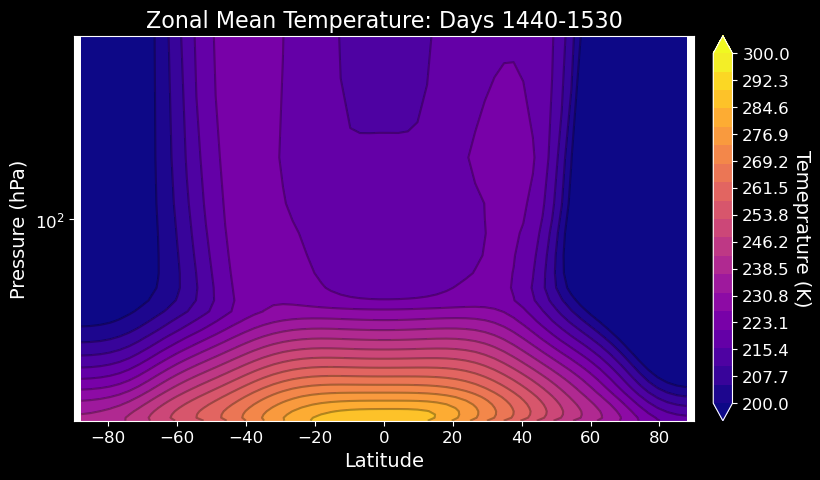

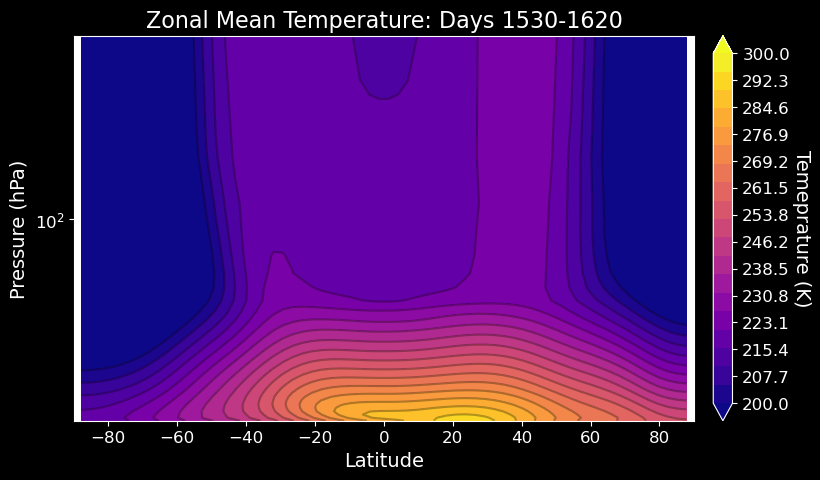

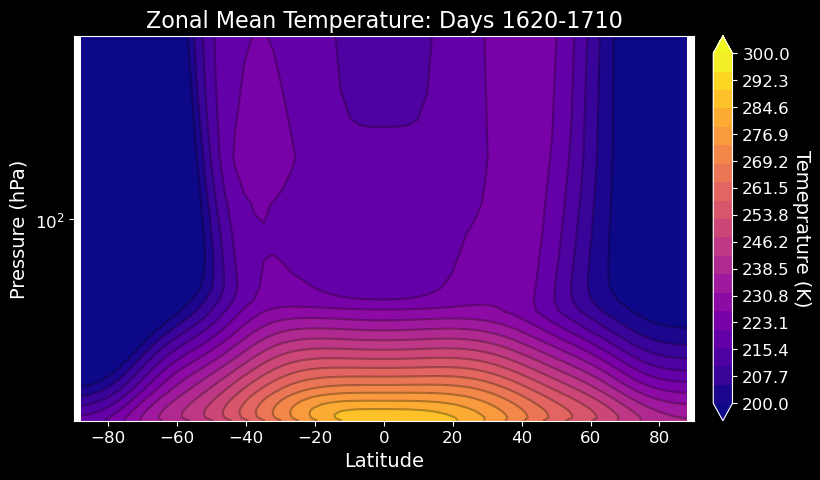

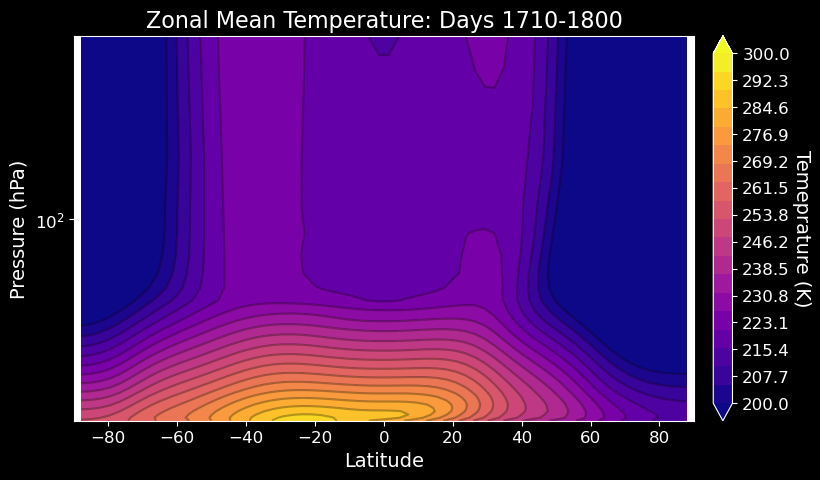

In [14]:
for t in range(1,21):
    vmin = 200
    vmax = 300
    nlevs = 20
    PROJECTDIR = '/home/cwk26/project/gfdl_data/top_down_test_obliquity15/'
    filename = f"run{t:04d}/atmos_daily.nc"
    data = xr.open_dataset(PROJECTDIR+filename,decode_times=False)
    time = data.time
    lon = data.lon
    lat = data.lat
    pfull = data.pfull
    u = data.ucomp
    v = data.vcomp
    temp = data.temp
    vort = data.vor
    
    fig, ax = plt.subplots(1,1,figsize=(10,5))
    fig.patch.set_facecolor('black')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    cax = ax.contourf(lat,pfull,tbar,cmap='plasma',levels=np.linspace(vmin,vmax,nlevs),extend='both')
    cbar = fig.colorbar(cax,anchor=(-0.2,0),ticks=np.linspace(vmin,vmax,14))
    cbar.ax.set_ylabel('Temperature (K)',fontsize=14,color='white',rotation=270,labelpad=15)
    for spine in cbar.ax.spines.values():
        spine.set_edgecolor('white')
    cbar.ax.tick_params(colors='white',labelsize=12)
    ax.contour(lat,pfull,tbar,colors='black',alpha=0.3,levels=np.linspace(vmin,vmax,nlevs))
    ax.set_xlim(-90,90)
    ax.set_ylim(pfull[-1],pfull[0])
    ax.set_xlabel('Latitude',color='white',fontsize=14)
    ax.set_ylabel('Pressure (hPa)',color='white',fontsize=14)
    ax.set_title('Zonal Mean Temperature: Days '+str(90*(t-1))+'-'+str(90*(t)),color='white',fontsize=16)
    ax.tick_params(colors='white',labelsize=12)
    ax.set_yscale('log')

    plt.show